# Greetings
The [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) used in this notebook is provided from Open-Sourcing Mental Illness, LTD (OSMI) in 2016. The results of a survey, which were conducted to gauge the impact of mental health illnesses among employees.

## Data Exploration
This section is dedicated to shaping an understanding of the data, identifying any underlying issues, and preparing to address them in subsequent phases. This stage is pivotal as it lays the foundation for various decisions concerning data imputation and data wrangling and more.

During this phase, we solely conduct exploratory data analysis, using descriptive statistics and visualizations. No alterations will be made to the data at this stage.

### List of contents :
1. __Overview__ 
2. __Exploratory Data Analysis__
2.1. Column 0 to 23
2.2. Column 24 to 35
2.3. Column 36 to 39
2.4. Column 40 to 46
2.5. Column 47 to 52
2.6. Column 53 and 54
3. __Summary__

Importing the required libraries

In [1]:
# Path library for generating OS paths efficiently
from pathlib import Path

# Data analysis library
import pandas as pd

# Python library for numerical computation 
import numpy as np

# Powerful data visualization library
import seaborn as sns

# The base library for plotting graphs in python
import matplotlib.pyplot as plt  

## 1. Overview

The aim of this phase is to get to know the data at hand.

First, let's start by loading the data. 

In [2]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
data = pd.read_csv(f'{path}/data/mental-heath-in-tech-2016_20161114.csv')
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
print(f"The data is formed through {data.shape[1]} columns/features and {data.shape[0]} rows/records.")

The data is formed through 63 columns/features and 1433 rows/records.


In [4]:
data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


__Insights :__
- Out of a total of 63 columns, merely 7 contain numerical data. 
- The changing count between columns implies the presence of missing values within the dataset. 
- Unusual entries within the age column were identified, necessitating an appropriate filling approach.

As we seek further investigations, we might use the __".info()"__ method, but we want to need to explore unique values within each column as this information will help us later on.

In [5]:
# Initiating an empty list data_info 
data_info = []

# Gathering the attributes in one place 
for index, column in enumerate(data.columns):
    info = {
        'name': column,  # The name of the column 
        'empty_values': data[column].isna().sum(),  # The number of empty values in a column
        'unique_values': data[column].unique().__len__(),  # The number of unique values 
        'data_type': data[column].dtypes  # The data type of column
    }

    # Appending the values  
    data_info.append(info)

# Create a DataFrame from the gathered information
null_categories_data = pd.DataFrame(data_info).sort_values(by=['empty_values'], ascending=False)
null_categories_data

,name,empty_values,unique_values,data_type
19,If you have revealed a mental health issue to ...,1289,4,object
23,"If yes, what percentage of your work time (tim...",1229,5,object
3,Is your primary role within your company relat...,1170,3,float64
17,Do you know local or online resources to seek ...,1146,4,object
16,Do you have medical coverage (private insuranc...,1146,3,float64
...,...,...,...,...
40,Do you feel that being identified as a person ...,0,5,object
38,Would you bring up a mental health issue with ...,0,3,object
36,Would you be willing to bring up a physical he...,0,3,object
24,Do you have previous employers?,0,2,int64


## 2. Exploratory Data Analysis
In this section, we're iterating over columns based on relevancy. We can inspect 11 at a time as we can inspect two or three at a time. For a clearer view, visualizations are used where appropriate.

### 2.1 Columns 0 to 23

The __Are you self-employed?, How many employees does your company or organization have?, Is your employer primarily a tech company/organization?, Is your primary role within your company related to tech/IT?__ investigate basic information on the respondent.

In [6]:
# Performing aggregations on the first few columns using the value_counts method
aggregations = {
    "Number of employees": data["Are you self-employed?"].value_counts()[0],
    "Number of self-employed": data["Are you self-employed?"].value_counts()[1],
    "Number of employees in IT related companies":
        data['Is your employer primarily a tech company/organization?'].value_counts()[1],
    "Number of employees in non-IT related companies":
        data['Is your employer primarily a tech company/organization?'].value_counts()[0],
    "Number of employees in non-IT related companies with IT related role":
        data["Is your primary role within your company related to tech/IT?"].value_counts()[1],
    "Number of employees in non-IT related companies with non-IT related role":
        data["Is your primary role within your company related to tech/IT?"].value_counts()[0]
}

# Print the dictionary
aggregations

{'Number of employees': 1146,
 'Number of self-employed': 287,
 'Number of employees in IT related companies': 883,
 'Number of employees in non-IT related companies': 263,
 'Number of employees in non-IT related companies with IT related role': 248,
 'Number of employees in non-IT related companies with non-IT related role': 15}

The following pie chart better illustrates the data

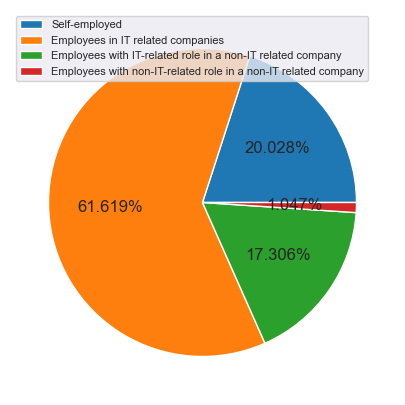

In [7]:
# Setting the labels and sizes lists 
labels = [
    'Self-employed',
    'Employees in IT related companies',
    'Employees with IT-related role in a non-IT related company',
    'Employees with non-IT-related role in a non-IT related company']

sizes = [
    aggregations["Number of self-employed"],
    aggregations["Number of employees in IT related companies"],
    aggregations["Number of employees in non-IT related companies with IT related role"],
    aggregations["Number of employees in non-IT related companies with non-IT related role"]
]

# Setting the style of the visuals
plt.style.use('fast')

# Starting fig1 and ax1 subplots objects
fig1, ax = plt.subplots(figsize=(15, 5))
ax.pie(
    sizes,  # List of values 
    autopct='%1.3f%%',  # Showing 3 numbers after the decimal point 
    textprops={'fontsize': 12}  # Setting the size of the ratios 
)

ax.legend(
    labels=labels,  # List of labels
    loc="upper left",  # Position of the legend
    fontsize=8)  # Size of the legend

# Plotting the figure
plt.show()

The organization's size in our data set varies. The next graph describes this variation :

In [8]:
# Performing aggregation using .value_counts()
organization_size = pd.DataFrame(data["How many employees does your company or organization have?"].value_counts())
organization_size

,count
How many employees does your company or organization have?,
26-100,292
More than 1000,256
100-500,248
6-25,210
500-1000,80
1-5,60


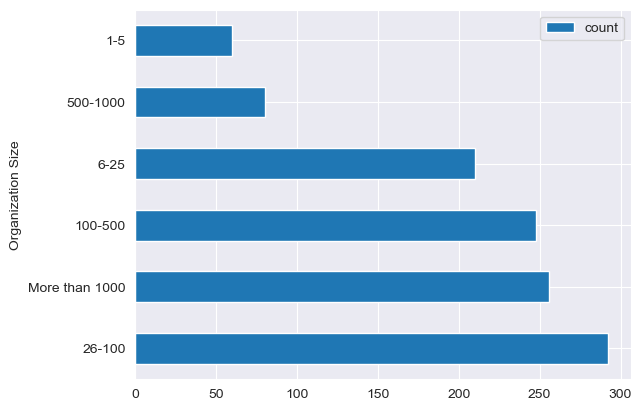

In [9]:
# Plotting horizontal bars plot with proper y-axis label
organization_size.plot(kind='barh')
plt.ylabel("Organization Size")

# Showing the plot
plt.show()

__Insights__ :
- The employees in IT-related companies don't provide a clear stand if they're hired in an IT-related role or not. These 883 missing values need to be handled properly.
- The employees are working for a broad category of organizations with medium and bigger size dominance. the 287 missing values in this column reflect the number of self-employed who didn't answer this question.
- __Sharing the exact same number of missing values__, the following columns contain unique values that vary between 3 and 6:
    - Does your employer provide mental health benefits as part of healthcare coverage?
    - Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    - Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    - If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
    - Do you think that discussing a mental health disorder with your employer would have negative consequences?
    - Do you think that discussing a physical health issue with your employer would have negative consequences?
    - Would you feel comfortable discussing a mental health disorder with your coworkers?
    - Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    - Do you feel that your employer takes mental health as seriously as physical health?
- The __Do you know the options for mental health care available under your employer-provided coverage?__ column has exactly four unique values and 420 missing values. 
- __Exceeding 1146 missing values__, the following columns are more likely to be dropped due to the significant number of missing values : 
    - Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?
    - Do you know local or online resources to seek help for a mental health disorder?
    - If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    - If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    - If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    - If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    - Do you believe your productivity is ever affected by a mental health issue?
    - If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"

### 2.2 Columns 24 to 35
In the next column, the respondents are filtered into previously employed or not.  

In [10]:
# Performing aggregation using .value_counts()
data["Do you have previous employers?"].value_counts()

Do you have previous employers?
1    1264
0     169
Name: count, dtype: int64

__Insights__ :
- The majority of employees have previous employment history.
- The next 11 columns have either four or five unique values tend to have the exact same value of 169 missing values reflects the missing responses of 169 employees who don't have a previous employer : 
    - Have your previous employers provided mental health benefits?
    - Were you aware of the options for mental health care provided by your previous employers?
    - Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    - Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    - Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    - Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    - Do you think that discussing a physical health issue with previous employers would have negative consequences?
    - Would you have been willing to discuss a mental health issue with your previous co-workers?
    - Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    - Did you feel that your previous employers took mental health as seriously as physical health?
    - Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?

### 2.3 Columns 36 to 39
Next, we observe how the opinions are distributed in the matter of revealing both physical and mental health issues.

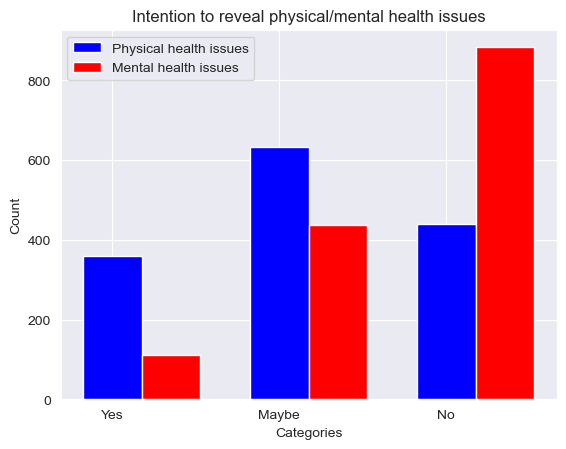

In [11]:
# Performing aggregations on the columns, then saving them into dictionaries
phi = data[
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?"].value_counts().to_dict()
mhi = data[
    "Would you bring up a mental health issue with a potential employer in an interview?"].value_counts().to_dict()

# Setting the components for the chart
categories = ['Yes', 'Maybe', 'No']
phi_values = [phi['Yes'], phi['Maybe'], phi['No']]
mhi_values = [mhi['Yes'], mhi['Maybe'], mhi['No']]

# Set the width of the bars
bar_width = 0.35

# Create figure and axis
fig, ax = plt.subplots()

# Plot the first set of bars
bar1 = ax.bar(np.arange(len(categories)), phi_values, bar_width, color='blue', label='Physical health issues')

# Calculate the position for the second set of bars
bar2_position = np.arange(len(categories)) + bar_width

# Plot the second set of bars
bar2 = ax.bar(bar2_position, mhi_values, bar_width, color='red', label='Mental health issues')

# Set labels and ticks
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Add legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax.legend(bars, labels)

# Show plot
plt.title('Intention to reveal physical/mental health issues')
plt.show()

__Insights :__
- There is a nuanced spread of responses to revealing physical health issues, with a slight advantage towards uncertainty and disagreement, while still encompassing a proportion of agreement.
- A notable prevalence of negative sentiment among respondents to reveal mental health issues with a discernible emphasis on disagreement and uncertainty compared to agreement.
- The reasons for all choices are different as their count goes above 1000 entry.

### 2.4 Columns 40 to 46

Among these columns, we shall explore the 2 columns with supicious number of empty values which doesn't make sense.

In [12]:
# Setting a subset called new_df 
new_df = data[[
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?']].copy()

# Replacing the missing values
new_df[
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].fillna(
    'empty_value', inplace=True)
new_df[
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'].fillna(
    'empty_value', inplace=True)

# Performing some aggregations
new_df.value_counts()

Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?  Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
No                                                                                                                                          empty_value                                                                                                                                                                         567
Maybe/Not sure                                                                                                                              No                                                                                                                                                                                  137
Yes, I observed                    

__Insights__ : 
- The following columns hold three to six unique values with no empty values:
    - Do you feel that being identified as a person with a mental health issue would hurt your career?-
    - Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    - How willing would you be to share with friends and family that you have a mental illness?
    - Do you have a family history of mental illness?
    - Have you had a mental health disorder in the past?
- The two remaining columns can benefit from adding another unique value __I don't know__, instead of dropping them due to the enormous number of empty values. 

### 2.6 Columns 47 to 54

Among these columns, we shall explore the two columns with suspicious number of empty values which doesn't make sense.

In [13]:
# Inspect the unique values within this column
data["Do you currently have a mental health disorder?"].value_counts()

Do you currently have a mental health disorder?
Yes      575
No       531
Maybe    327
Name: count, dtype: int64

In the __If yes, what condition(s) have you been diagnosed with?, If maybe, what condition(s) do you believe you have?, and If so, what condition(s) were you diagnosed with?__ columns, the respondents can select more than one condition.

In [17]:
data['If yes, what condition(s) have you been diagnosed with?'].value_counts()

If yes, what condition(s) have you been diagnosed with?
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                       117
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                           102
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                          47
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperact

The following function __conditions_counter__ will help provide how many time a condition was selected by one of our respondents.

In [14]:
# Defining a function called condition_counter
def conditions_counter(column_name):
    """
    :param column_name: The name of column desired
    :return: a Dataframe containing the conditions and the number of their occurrences in the column
    """

    # Creating the list of unique values excluding empty values
    a_list = pd.DataFrame(data[column_name].value_counts()).reset_index().iloc[:, 0].to_list()
    
    # Creating an empty dictionary
    a_dict = dict()
    
    # Initiating a for-loop
    for element in a_list:
        # Inspecting the existence of a character 
        if '|' in element:
            elements = element.split("|")
            # If the condition is met
            for unit in elements:
                # Iterating each unit  
                if unit in a_dict:
                    a_dict[unit] += 1 # Augment the number if it does exist
                else:
                    a_dict[unit] = 1 # Set the number to 1 if a new occurrence is found
        else:
            if element in a_dict:
                a_dict[element] += 1
            else:
                a_dict[element] = 1
    
    # Turning the data stored in the dictionary into a dataframe
    dframe = pd.DataFrame(list(a_dict.items()), columns=['Condition', 'Count'])
    
    # The final output of the function
    return dframe

In [15]:
# Setting the dataframes
confirmed_conditions = conditions_counter("If yes, what condition(s) have you been diagnosed with?")
suspected_conditions = conditions_counter("If maybe, what condition(s) do you believe you have?")
diagnosed_conditions = conditions_counter("If so, what condition(s) were you diagnosed with?")

In [23]:
data['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()

Have you been diagnosed with a mental health condition by a medical professional?
No     717
Yes    716
Name: count, dtype: int64

In [29]:
# 
final_df = pd.merge(
    pd.merge(
        confirmed_conditions, 
        suspected_conditions, 
        on='Condition', how='outer', 
        suffixes=('_confirmed', '_suspected')
    ), 
    diagnosed_conditions, 
    on='Condition', how='outer'
)

# 
final_df[['Count_confirmed', 'Count_suspected', 'Count']] = final_df[['Count_confirmed', 'Count_suspected', 'Count']].replace(np.nan, 0)

# 
final_df[['Count_confirmed', 'Count_suspected', 'Count']] = final_df[['Count_confirmed', 'Count_suspected', 'Count']].astype('int64')

# 
final_df

,Condition,Count_confirmed,Count_suspected,Count
0,"Anxiety Disorder (Generalized, Social, Phobia,...",71,53,55
1,"Mood Disorder (Depression, Bipolar Disorder, etc)",76,54,68
2,Attention Deficit Hyperactivity Disorder,38,27,29
3,Post-traumatic Stress Disorder,37,15,35
4,"Eating Disorder (Anorexia, Bulimia, etc)",17,6,15
5,Obsessive-Compulsive Disorder,26,19,21
6,Substance Use Disorder,25,13,22
7,Addictive Disorder,25,19,13
8,Stress Response Syndromes,24,24,12
9,"Psychotic Disorder (Schizophrenia, Schizoaffec...",2,8,3


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Create DataFrame
df = correlation_matrix


# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# Calculate Cramér's V for each pair of columns
cramers_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
for i in df.columns:
    for j in df.columns:
        cramers_v_matrix.loc[i, j] = cramers_v(df[i], df[j])

# Print Cramér's V matrix
print("Cramér's V Matrix:")
print(cramers_v_matrix)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Having many unique values for columns such as the respondent organization's size, country of residence, and age can be somewhat understandable but having this for the gender column isn't. 

In [ ]:
die = pd.DataFrame(data["What is your gender?"].value_counts()).reset_index()
die.head(70)

The reason for this as can be showed here is there are some identical answers but written differently. this should be handled as well to reduce the number of unique values.

in addition to the gender column, among the columns with high numbers of unique values, only one column can be in danger of typos and erroneous input which is the age column

In [ ]:
das = pd.DataFrame(data["What is your age?"].value_counts()).reset_index()

das.plot(kind="scatter",
         x="What is your age?",
         y="count",
         xlim=0,
         ylim=0)

plt.show()

As we predicted, the age column includes some erroneous inouts, because there are no 100+ years old employee and no less than 18-year-old employee. Therefore, this column needs a cleaning in this sense.

In [ ]:
lista = list(set([element for element in data["If so, what condition(s) were you diagnosed with?"].to_list()]))[1:]

my_dict = dict()

for element in lista:
    if '|' in element:
        conditions = element.split("|")

        for condition in conditions:
            if condition in my_dict:
                my_dict[condition] += 1
            else:
                my_dict[condition] = 1
    else:
        if element in my_dict:
            my_dict[element] += 1
        else:
            my_dict[element] = 1

fdd = pd.DataFrame(list(my_dict.items()), columns=['Condition', 'Count'])
fdd

# Summary
The data exploration of this dataset showed various aspects and insights. Some of which will have to be handled in the phase of pre-processing are included here :
- Reason 1.
- Reason 2.
- Reason 3.

## Authors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |